<a href="https://colab.research.google.com/github/harshikesh-kumar/Projects/blob/master/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 450kB 66.5MB/s 
     |████████████████████████████████| 3.9MB 46.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [ ]:
!nvidia-smi

Wed Mar 11 11:30:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

print(tf.__version__)

2.1.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

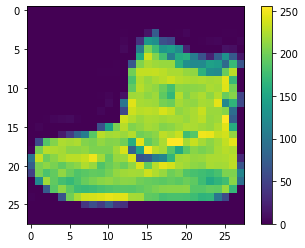

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

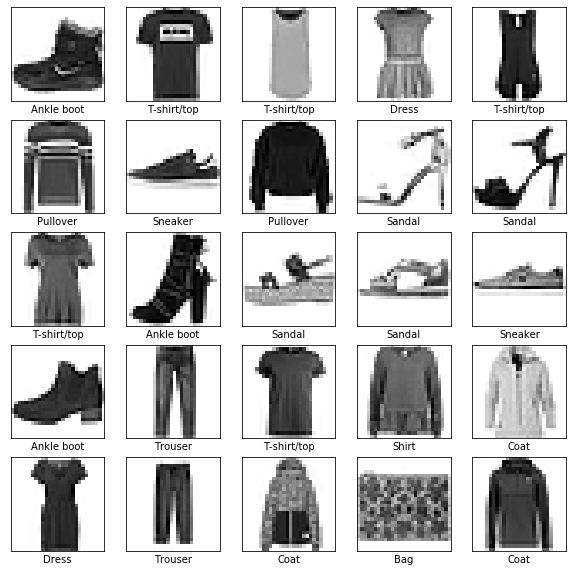

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4945 - accuracy: 0.8253
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3739 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3360 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3117 - accuracy: 0.8860
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2915 - accuracy: 0.8933
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2780 - accuracy: 0.8972
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2684 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2587 - accuracy: 0.9042
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2462 - accuracy: 0.9066
Epoch 10/10
60

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3595 - accuracy: 0.8762

Test accuracy: 0.8762


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([6.8091621e-10, 4.9959170e-09, 1.6453762e-11, 1.5589975e-14,
       8.0492835e-11, 2.9855899e-03, 4.2410855e-10, 2.6628366e-02,
       2.6847701e-07, 9.7038585e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

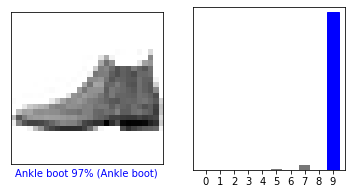

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

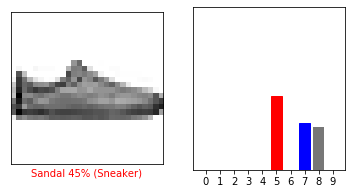

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

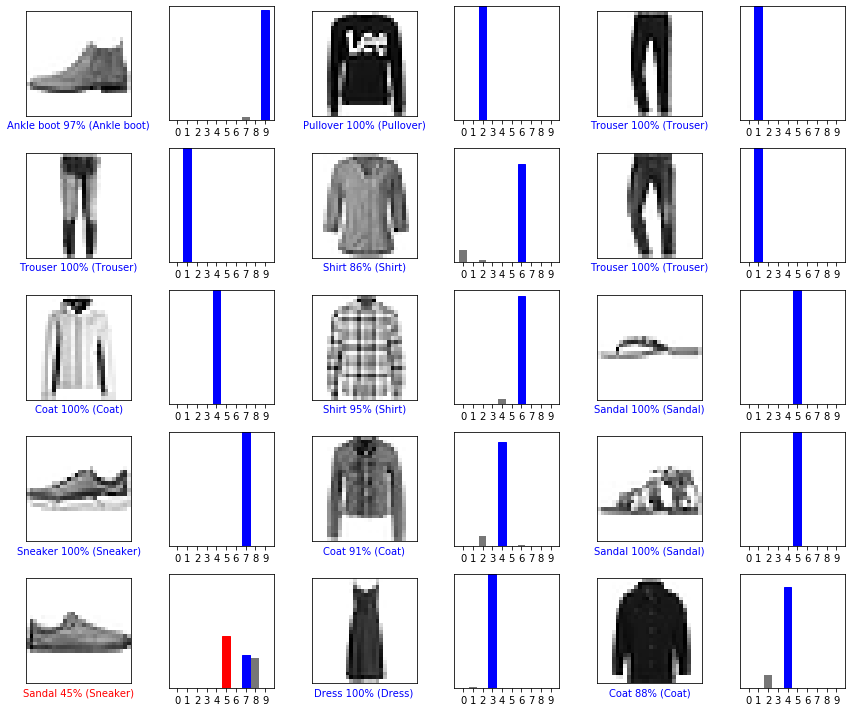

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [ ]:
#use traied model
# Grab an image from the test dataset.
img = cv2.imread('/content/drive/My Drive/photo-1550173093-3cab1f3b671f.jfif')

gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img = cv2.resize(gray_img,(28,28))
cv2_imshow(img)
print(img.shape)

cv2.waitKey(0)
cv2.destroyAllWindows()



(28, 28)


In [ ]:
img = np.expand_dims(img,0)

print(img.shape)
predictions_single = probability_model.predict(img)


print(predictions_single)

(1, 28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


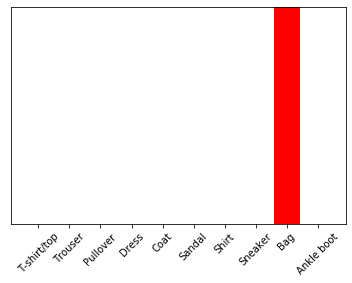

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

8

In [ ]:
import numpy 
import matplotlib.pyplot as plt


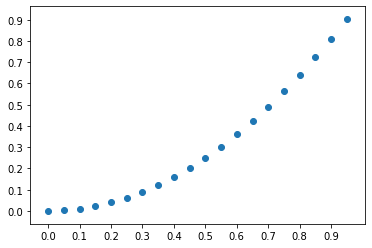

In [ ]:
x = numpy.arange(0, 1, 0.05)
y = numpy.power(x, 2)

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0, 1, 0.1))
ax.set_yticks(numpy.arange(0, 1, 0.1))
plt.scatter(x, y)
plt.show()